In [18]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import numpy.linalg as la
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
from data_parser import parse
from data_modification import normalise_patient, center_patient, cylindrical_patient
from visualization.plot_vcg import plot_vcg_axes, plot_3d_vcg

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
patient_no = 1
data_path = 'H:/Yngve/Dropbox/SimulaSummerSchool_Group9/data/lbbb_lvdyssync'

In [19]:
patient = normalise_patient(parse(initial_path=data_path, patient_number=patient_no))
patient_center = center_patient(patient)
patient_cyl = cylindrical_patient(patient_center)

# 3D plots of heart vectors

<IPython.core.display.Javascript object>


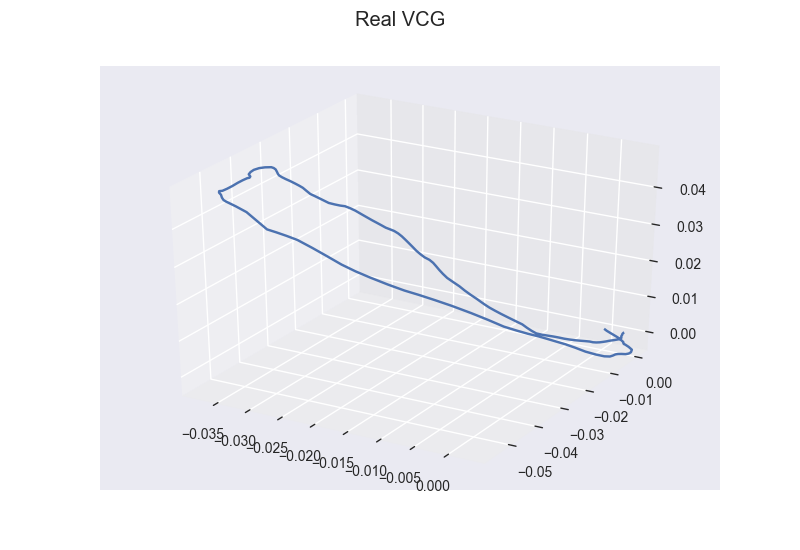

In [21]:
fig, _, _ = plot_3d_vcg(np.array(patient['vcg_real']))
fig.suptitle('Real VCG')

<IPython.core.display.Javascript object>


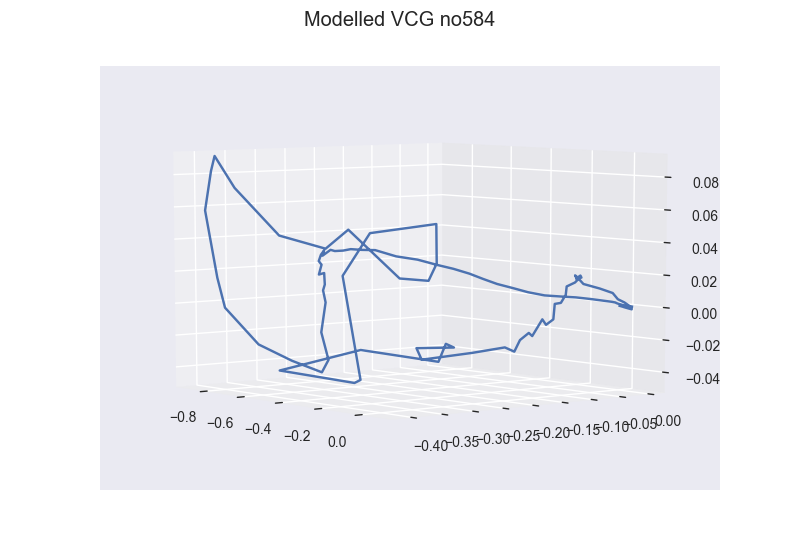

In [23]:
fig, ax, wire = plot_3d_vcg(np.array(patient['vcg_model'][0]))
fig.suptitle('Modelled VCG no 0')

pat_slider = widgets.IntSlider(0, 0, len(patient['vcg_model']), description='Sim no:')
plot_button = widgets.Button(description='Plot VCG')

def replot(click):
    global fig, ax, wire, pat_slider
    fig, ax, wire = plot_3d_vcg(np.array(patient['vcg_model'][pat_slider.value]), figure=fig, axes=ax, wire=wire)
    fig.suptitle('Modelled VCG no{}'.format(pat_slider.value))
    
plot_button.on_click(replot)

display(pat_slider, plot_button)

# VCG's in cartesian coordinates

<IPython.core.display.Javascript object>


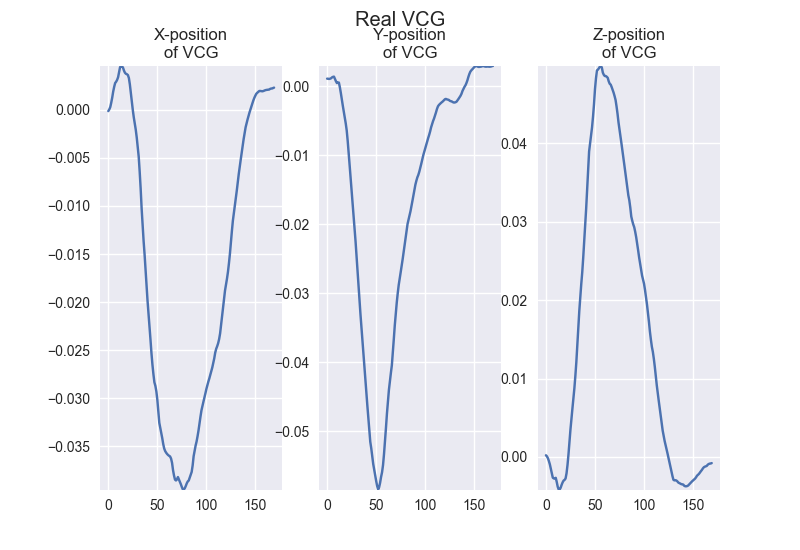

In [35]:
fig, _, _, = plot_vcg_axes(np.array(patient['vcg_real']))
fig.suptitle('Real VCG')

<IPython.core.display.Javascript object>


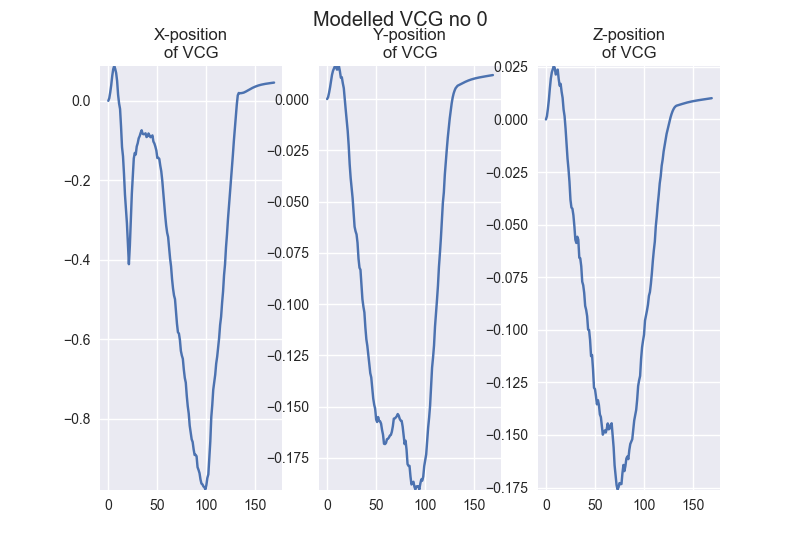

In [36]:
fig, ax, plots = plot_vcg_axes(np.array(patient['vcg_model'][0]))
fig.suptitle('Modelled VCG no 0')
pat_slider = widgets.IntSlider(0, 0, len(patient['vcg_model']), description='Sim no:')
plot_button = widgets.Button(description='Plot VCG')

def replot(click):
    global fig, ax, plots, pat_slider
    plot_vcg_axes(np.array(patient['vcg_model'][pat_slider.value]), figure=fig, axes=ax, plots=plots)
    fig.suptitle('Modelled VCG no {}'.format(pat_slider.value))

plot_button.on_click(replot)
display(pat_slider, plot_button)

# VCGs in cylindrical coordinates
### After centering

<IPython.core.display.Javascript object>


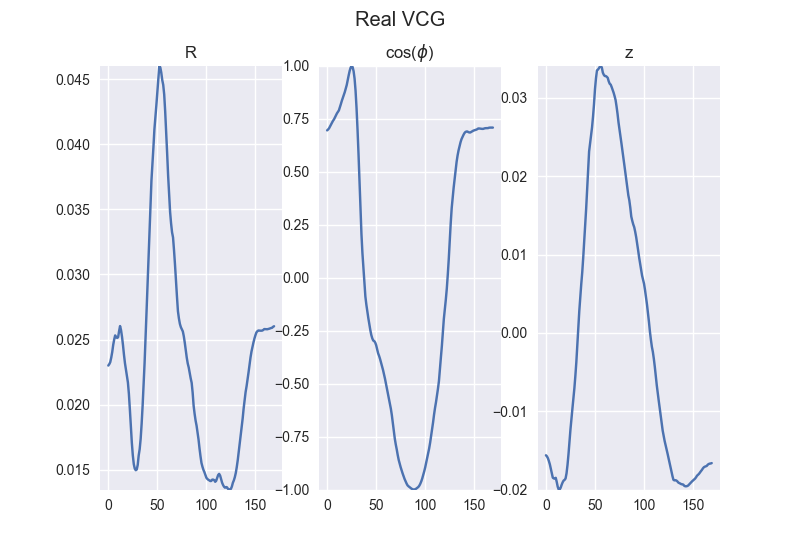

In [32]:
transforms = [None, lambda x: np.cos(x), None]
fig, _, _, = plot_vcg_axes(np.array(patient_cyl['vcg_real']), titles=['R', 'cos($\phi$)', 'z'], transforms=transforms)
fig.suptitle('Real VCG')

<IPython.core.display.Javascript object>


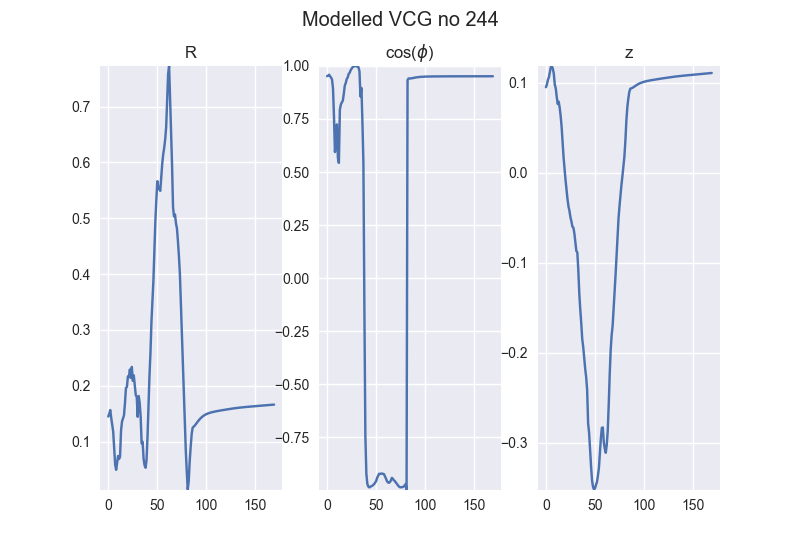

In [34]:
transforms = [None, lambda x: np.cos(x), None]
fig, ax, plots = plot_vcg_axes(np.array(patient_cyl['vcg_model'][0]), titles=['R', '$cos(\phi)$', 'z'], transforms=transforms)
fig.suptitle('Modelled VCG no 0')
pat_slider = widgets.IntSlider(0, 0, len(patient['vcg_model']), description='Sim no:')
plot_button = widgets.Button(description='Plot VCG')

def replot(click):
    global fig, ax, plots, pat_slider
    plot_vcg_axes(np.array(patient_cyl['vcg_model'][pat_slider.value]), figure=fig, axes=ax, plots=plots, titles=['R', 'cos($\phi$)', 'z'], transforms=transforms)
    fig.suptitle('Modelled VCG no {}'.format(pat_slider.value))

plot_button.on_click(replot)
display(pat_slider, plot_button)